<img src="entete3.png">

<h1><font color='orange'>Partie Théorique : </font></h1>

<h2><font color='blue'> 1) Définition </font></h2>

la distance de Mahalanobis est une mesure de distance mathématique introduite par Prasanta Chandra Mahalanobis en 19361. Elle est basée sur la corrélation entre des variables par lesquelles différents modèles peuvent être identifiés et analysés. C'est une manière utile de déterminer la similarité entre une série de données connues et inconnues. Elle diffère de la distance euclidienne par le fait qu'elle prend en compte la variance et la corrélation de la série de données. Ainsi, à la différence de la distance euclidienne où toutes les composantes des vecteurs sont traitées indépendamment et de la même façon, la distance de Mahalanobis accorde un poids moins important aux composantes les plus dispersées. Dans le cas de l'analyse des signaux, et en supposant que chaque composante soit une variable aléatoire de type gaussien, cela revient à minimiser l'influence des composantes les plus bruitées (celles ayant la plus grande variance). 

La distance de Mahalanobis est souvent utilisée pour la détection de données aberrantes dans un jeu de données, ou bien pour déterminer la cohérence de données fournies par un capteur par exemple : cette distance est calculée entre les données reçues et celles prédites par un modèle. 

<img src="img.png">

<h2><font color='blue'> 2) Propriétés </font></h2>

<img src="img1.png">

<img src="img2.png">

<h2><font color='blue'> 3) Explication intuitive</font></h2>

Considérons le problème de l'estimation de la probabilité qu'un point de test dans l' espace euclidien à N dimensions appartienne à un ensemble, où l'on nous donne des points d'échantillonnage qui appartiennent définitivement à cet ensemble. Notre première étape serait de trouver le centroïde ou le centre de masse des points d'échantillonnage. Intuitivement, plus le point en question est proche de ce centre de gravité, plus il a de chances d'appartenir à l'ensemble. <br>
Cependant, nous devons également savoir si l'ensemble est étalé sur une grande ou une petite plage, afin de pouvoir décider si une distance donnée du centre est remarquable ou non. L'approche simpliste consiste à estimer l' écart type des distances entre les points d'échantillonnage et le centre de masse. Si la distance entre le point de test et le centre de masse est inférieure à un écart type, alors nous pourrions conclure qu'il est hautement probable que le point de test appartienne à l'ensemble. Plus il est éloigné, plus il est probable que le point de test ne soit pas classé comme appartenant à l'ensemble.

<img src="img3.png">

L'inconvénient de l'approche ci-dessus était que nous avons supposé que les points d'échantillonnage sont répartis autour du centre de masse de manière sphérique. Si la distribution était résolument non sphérique, par exemple ellipsoïdale, alors nous nous attendrions à ce que la probabilité que le point de test appartienne à l'ensemble dépende non seulement de la distance du centre de masse, mais également de la direction. Dans les directions où l'ellipsoïde a un axe court, le point de test doit être plus proche, tandis que dans celles où l'axe est long, le point de test peut être plus éloigné du centre. <br>
En posant cela sur une base mathématique, l'ellipsoïde qui représente le mieux la distribution de probabilité de l'ensemble peut être estimé en construisant la matrice de covariance des échantillons. La distance de Mahalanobis est la distance entre le point de test et le centre de masse divisée par la largeur de l'ellipsoïde dans la direction du point de test.

<h2><font color='blue'> 4) Distributions normales</font></h2>

<img src="img4.png">

La distance de Mahalanobis est proportionnelle, pour une distribution normale, à la racine carrée de la log-vraisemblance négative (après avoir ajouté une constante de sorte que le minimum soit à zéro).

<h2><font color='blue'> 5) Relation avec les variables aléatoires normales </font></h2>

<img src="img5.png">

<h2><font color='blue'> 6) Applications</font></h2>

La définition de Mahalanobis a été motivée par le problème de l'identification des similitudes des crânes sur la base de mesures en 1927. <br>
La distance de Mahalanobis est largement utilisée dans les techniques d' analyse et de classification par grappes . Elle est étroitement liée à la distribution des carrés en T de Hotelling utilisée pour les tests statistiques multivariés et à l' analyse discriminante linéaire de Fisher qui est utilisée pour la classification supervisée . <br>
Afin d'utiliser la distance de Mahalanobis pour classer un point de test comme appartenant à l'une des N classes, on estime d' abord la matrice de covariance de chaque classe, généralement basée sur des échantillons connus pour appartenir à chaque classe. Ensuite, étant donné un échantillon de test, on calcule la distance de Mahalanobis à chaque classe, et classe le point de test comme appartenant à cette classe pour laquelle la distance de Mahalanobis est minimale.

<h2><font color='blue'> 7) Implémentations logicielles </font></h2>

De nombreux programmes et packages de statistiques, tels que R , Python , etc., incluent des implémentations de la distance Mahalanobis.

<h1><font color='orange'>Partie Pratique : </font></h1>

In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
x1 = np.random.normal(0, 5, 1000)
x2 = np.random.normal(0, 1, 1000)


In [4]:
df = pd.DataFrame({
    'x1': x1, 
    'x2': x2
})

<AxesSubplot:xlabel='x1', ylabel='x2'>

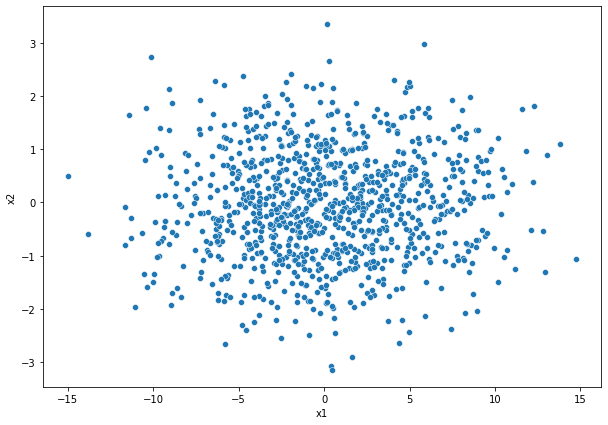

In [5]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)

In [6]:


def mahalanobis_distance(p, q, df):
    A = p - q
    B = (p - q).T
    covariance_matrix = np.array(df.cov())
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    return np.dot(np.dot(A, inverse_covariance_matrix), B)



In [7]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [8]:
df

,x1,x2
0,-2.565483,0.749798
1,5.311609,0.042024
2,-5.017776,0.586373
3,-1.537621,-0.099286
4,-4.249948,-1.043234
...,...,...
995,-2.665311,-0.417940
996,2.247612,1.327194
997,5.973225,-1.491188
998,-2.997206,-0.652894


In [9]:


x1_min_arg = x1[np.argsort(x1)[0]]
x1_max_arg = x1[np.argsort(x1)[-1]]
x2_min_arg, x2_max_arg = x2[np.where((x2 > np.mean(x2) - .2) & (x2 < np.mean(x2) + .2))[0][0:2]]



<AxesSubplot:xlabel='x1', ylabel='x2'>

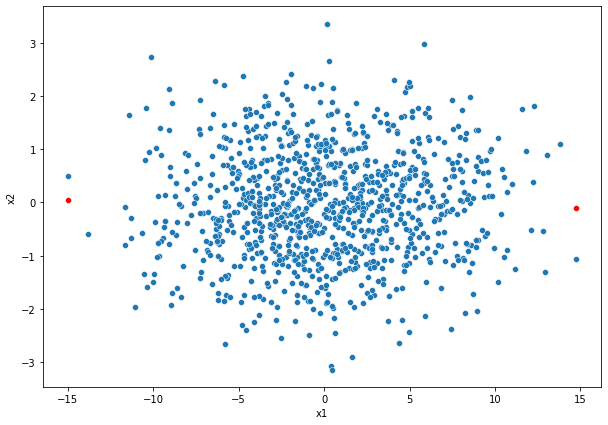

In [10]:


plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=[x1_min_arg, x1_max_arg], y=[x2_min_arg, x2_max_arg], color='red')



In [11]:
p = np.array([[x1_min_arg, x2_min_arg]])
q = np.array([[x1_max_arg, x2_max_arg]])

In [12]:


euclidean_distance(p, q)



29.691771682116865

In [13]:
mahalanobis_distance(p, q, df)

array([[36.0629176]])

In [14]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]

In [15]:
df.head(3)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327


In [16]:
df.iloc[11].values

array([2.30e-01, 6.28e+01, 3.40e+02])

In [17]:
mahalanobis_distance(df.iloc[10].values, df.iloc[11].values, df)

0.7919318634752811